# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Creating Data

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

# bir sinüs datası oluşturdum. sonuçta sinüs datası birbirini tekrar edecek
# bunun için linspace ile 0 ile 50 arasında 501 tane sayı oluşturdum.
# y değerleri de bunların sin() değerleri oldu.

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

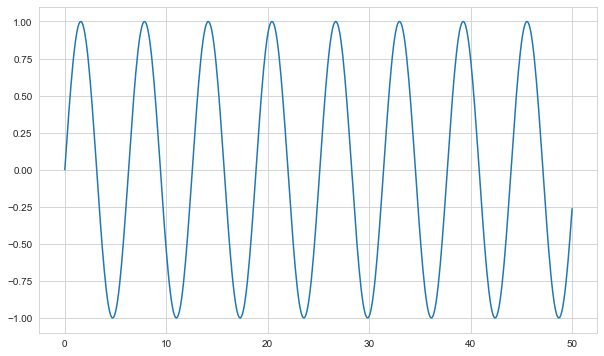

In [5]:
plt.plot(x,y)

# görüldüğü gibi bir sonraki bir öncekiyle ilişkili olan anlamlı bir veri oluştu.

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

# datası sinüs değelerinden oluşan bir dataframe oluşturduk.

In [7]:
df

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.15
# datanın % 15 ini test için ayırmak istiyorum.

In [10]:
len(df)*test_percent

# test datamın uzunluğu 75

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)

test_point

75.0

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

# indeksi 426 sonrası olan data test datam olacak. 426 dan öncesi train datam olacak

426

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

# train ve test olarak datamı bölmüş oldum.

In [15]:
train

,Sine
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [16]:
test

,Sine
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler,

# verilerimi 0 ile 1 arasında topluycam. minmaxscaler kullanacağım.

SyntaxError: trailing comma not allowed without surrounding parentheses (<ipython-input-17-b986fe4beaf8>, line 1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

In [ ]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps) 2 datadan 3.sünü tahmin edecek
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size)

# x trainim de y trainim de aynı yerde (tahmin edeceğim (target) ve train edeceğim datam aynı yerde) 
# o yüzden data ile targets parametreleri aynı (train_scaled)

In [ ]:
len(train_scaled)

In [ ]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

# train_scaled 426 satırdı fakat generator bana 424 adet data üretmiş. 
# çünkü benim sequence uzunluğum (lenght parametresi) 2. 
# eğitim yaparken kaydırmayı 2 adımda yaptığı için 2 değer kayıp oldu.(batch_size ?????)
# (örneğin ilk başta 0-1 indeks arasındaki datayı alıp 3. indeksi tahmin etti. sonra 2-3 indeksler arasını alıp 5. indeksi tahmin etti)

In [ ]:
generator[0]

In [ ]:
# What does the first batch look like?
X, y = generator[0]

In [ ]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

In [ ]:
train_scaled[:10]

In [ ]:
gen = pd.DataFrame(generator, columns = ["X", "y"])

In [ ]:
gen.head()

# x --> birinci ve ikinci featureları ile y target ını tahmin ediyor

In [ ]:
df.plot()

The more length the more training time

In [ ]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

# length = 64 --> 64 satırı alıp sonrakinin tahmin etmeye çalışacak.

In [ ]:
# What does the first batch look like?
X, y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

## Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [ ]:
# We're only using one feature in our time series
n_features = 1

In [ ]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 64, activation = "tanh", input_shape=(length, n_features)))  
# işlemi uzatmamak için nöron sayısını lenght sayısı olan 64 olarak belirledim. 128 de yapabilirdim.
# input_shape içine satır sayısı sütun sayısı gibi girdim.

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary() 

In [ ]:
# 4224 adet parametre oluşmuş.
# 64 tane inputumuz var. bunlardan 64 tane nörondan oluşan hidden layer a parametreler geliyor. (64 x 64)
# 1 tane Dense unit var. fully connected. burdan geriye geri besleme olacak.
# her nöronda birer bias değeri var
# Bunları çarpınca 4224 parametre yapıyor
# (64*64) + (64 + 64) = 4224

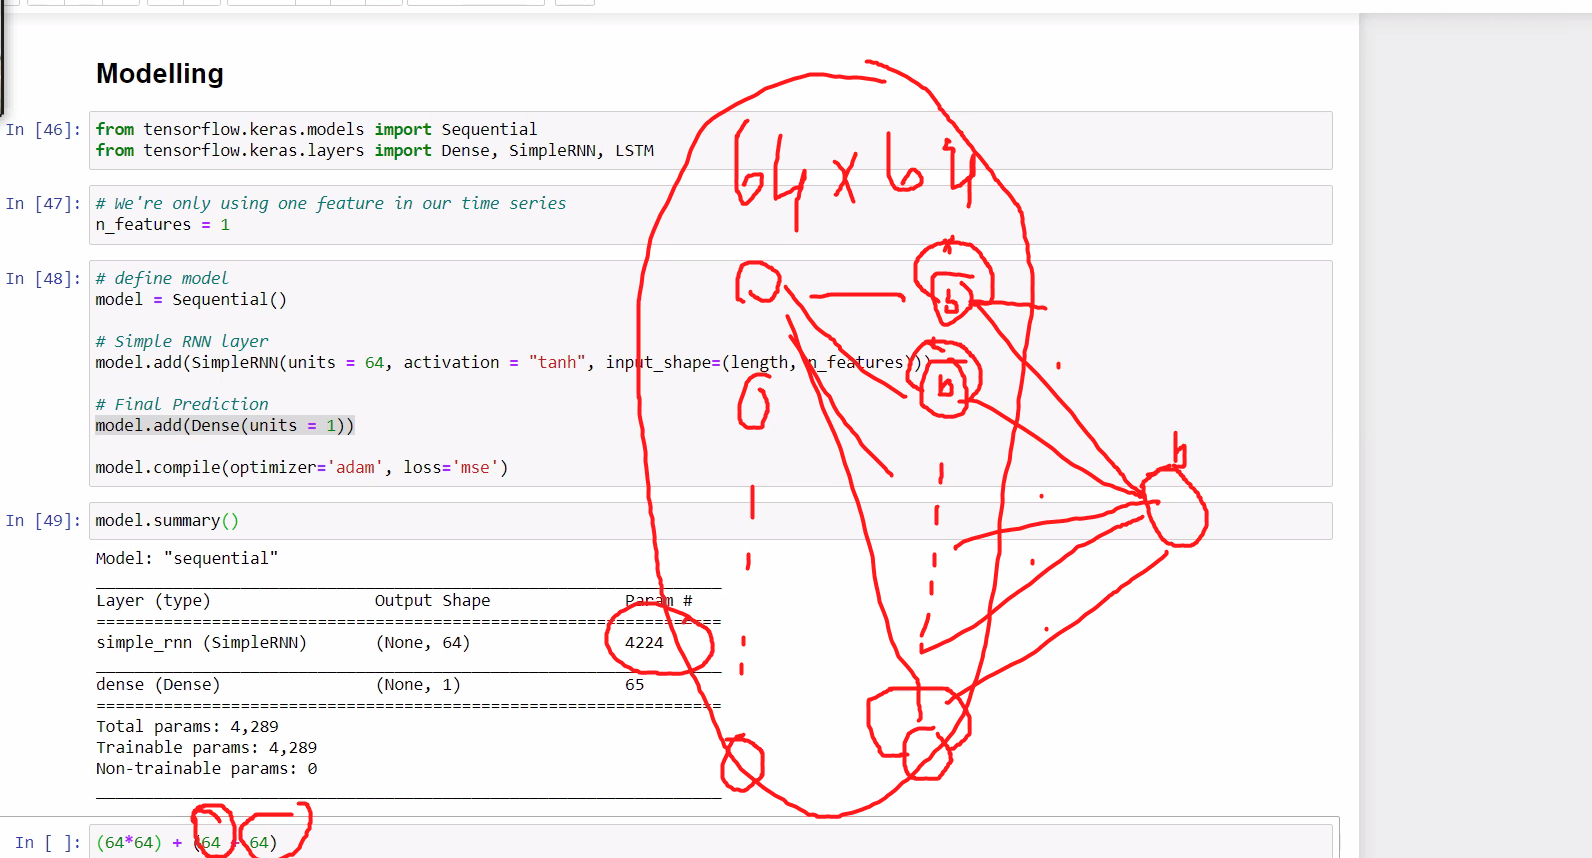

In [ ]:
(64*64) + (64 + 64)

In [ ]:
model.fit_generator(generator = generator, epochs = 5)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Evaluate on Test Data

In [ ]:
first_eval_batch = train_scaled[-length:]

# train setimin son sequence ini yani son 64'ü veriyorum. (yani 362 satır veriyorum)

In [ ]:
first_eval_batch.shape

In [ ]:
generator[0][0].shape

# generator'um bana 64 e 1 bir data üretmişti.

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

# son batch i aldım ve bunu reshape yaparak modelimin benden beklediği moda getirdim.

In [ ]:
first_eval_batch.shape

In [ ]:
model.predict(first_eval_batch)

# 64 veri ile yapılan ilk tahmini 0.00855426 çıktı

In [ ]:
test_scaled[0]

# ilk test değerim 0.00885189. 
# tahmin ettiğim değer buna çok yakın.

In [ ]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
current_batch.shape

In [ ]:
current_batch

In [ ]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1) 

# 0.0085  benim ilk predict (tahmin) değerimdi.

### Final For Loop to predict step by step 

In [ ]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))  

for i in range(len(test)):   # bu döngü ile her defasında alttan bir değeri iptal edip yerine yeni datayı ekleyecek. 
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]  # current batch ten aldığım tek predict i aldım.
    
    # store prediction
    test_predictions.append(current_pred) # o tek predict'i başta boş liste olan test_prediction a ekledim.
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)
    
    # yukarda 3 boyutlu array de bize kaç boyutlu eleman olduğunu gösteriyor.
    # bizim datamızın olduğu yer current_batch[:, 1:, :] deki ortadaki bölüm (1: olan bölüm)
    

In [ ]:
test_predictions

In [ ]:
test_scaled

## Inverse Transformations and Comparing

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

In [ ]:
test

In [ ]:
test['Predictions'] = true_predictions

In [ ]:
test

In [ ]:
test.plot()

## Early Stopping and Validation Generator

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)
# hem dataya hem target a train datamı verdim. 
# generator 'u oluştururken içinde length ve batch_size parametrelerini de koyuyorum. 
# generate ederken batch olarak edeceği için aşağıda model.fit_generator() yaparken batch değeri girmeyeceğim.

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)
# test datamı da modelimin kabul edeceği aynı şekile sokuyorum.

In [ ]:
len(validation_generator)

# train datamızda 75 datamız vardı. 75-64 = 11 tanesi validation'a ayrılmış oldu.
# dolayısıyla length'e vereceğimiz değer testten kısa olmalı ki validation için data kalsın

## LSTM

In [ ]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 64, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))    # 2 değeri karşılaştıracağım için çıkış layer ında 1 nöron olmalı.

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator = generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    callbacks = [early_stop])

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test

In [ ]:
test.plot()

## Retrain and Forecasting

In [18]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

<IPython.core.display.Javascript object>

In [19]:
length = 64 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

NameError: name 'TimeseriesGenerator' is not defined

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit_generator(generator, epochs = 6)  # yukarda generator un ürettiği tüm datayı kullandık.

In [ ]:
# datamın son 64 lük batch ini alıp  ileriye doğru forecast yapacağım. 

forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features)) 
# burdaki current_batch ilk oluşturacağım 64lük seri.

for i in range(64):  # bir saykıl yapmak için 64 olarak belirledim.
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast

In [ ]:
df

In [ ]:
len(forecast)

In [ ]:
64*0.1

In [ ]:
forecast_index = np.arange(50.1, 56.5, step = 0.1)

# df'imin son değeri 50 olduğu için forecast ile bunu devam ettirirken 50.1 den başladım. 
# 64 datadan oluşan bir batch'in 10'da birini bu değere ekleyip 0.1 step ile değerler ürettim.   
# dolayısıyla yeni forecast_index im yine 64 elemandan oluştu.

In [ ]:
len(forecast_index)

In [ ]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)